## Effect of Finetuning on Model Weights and Hidden States

In [1]:
%cd ~/cil-text-classification/ 

/cluster/home/rarade/cil-text-classification


In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import matplotlib.colors as colors

import torch
from transformers import RobertaForSequenceClassification

import pytorch_lightning as pl
from pytorch_lightning import Trainer

from core.utils.lime_utils import *
from core.utils.helper import *
from core.scripts.transformer import *

In [3]:
EXPERIMENT_PATH = '/cluster/scratch/rarade/roberta-25-06-2020/'

model1 = load_model_from_experiment(EXPERIMENT_PATH)
model2 = RobertaForSequenceClassification.from_pretrained('roberta-base')

Loading model  roberta-base


In [4]:
def show_plot(res, title='Change in model weights'):
    res = np.around(res, 6)
    if len(res.shape) == 1:
        res = res.reshape(-1, 1)
    
    plt.figure(figsize=(8, 5))
    fig, ax = plt.subplots()
    im = ax.imshow(res, cmap='Greens', interpolation='none')
    
    ax.set_yticks(np.arange(0, len(res), step=1))
    ax.set_yticklabels(np.arange(1, len(res)+1, step=1))
    if len(res.shape) > 1 and res.shape[1] != 1:
        ax.set_xticks(np.arange(0, len(res), step=1))
        ax.set_xticklabels(np.arange(1, len(res)+1, step=1))
    else: 
        ax.set_xticks([])
    cbar = fig.colorbar(im)

# define some parameters to make it work
model1.total_steps = 15000
model1.trained = True
model1.hparams.log_dir = '/cluster/scratch/rarade/tmp/'

seed()

### Effect of Finetuning on Model Weights

<Figure size 576x360 with 0 Axes>

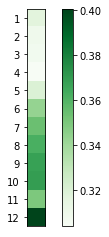

In [5]:
diffs = torch.zeros(12)

for i in range(0, 12):
    for (name1, param1), (name2, param2) in zip(model1.model.roberta.encoder.layer[i].named_parameters(), 
                                                model2.roberta.encoder.layer[i].named_parameters()):   
        with torch.no_grad():
            diffs[i] += torch.norm((param1/torch.norm(param1, p='fro'))-(param2/torch.norm(param2, p='fro')), p='fro')
    
show_plot(diffs.detach().numpy())